In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import sys
sys.path.append('../src')
from features.Pipeline import Pipeline

import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

In [54]:
wave_pipe = Pipeline("waveform")
stft_pipe = Pipeline("stft")
mel_pipe = Pipeline("mel")
mfcc_pipe = Pipeline("mfcc")
cqt_pipe = Pipeline("cqt")

# file_path = '../data/raw/NSynth/audio/bass_synthetic_068-022-075.wav'
file_path = '../data/raw/NSynth/audio/bass_synthetic_034-069-025.wav'

wave_spectro = wave_pipe.process(file_path)
stft_spectro = stft_pipe.process(file_path)
mel_spectro = mel_pipe.process(file_path)
mfcc_spectro = mfcc_pipe.process(file_path)
cqt_spectro = cqt_pipe.process(file_path)

In [55]:
print(f'WAVE transformation result shape: {wave_spectro.shape}')
print(f'STFT transformation result shape: {stft_spectro.shape}')
print(f'MEL transformation result shape: {mel_spectro.shape}')
print(f'MFCC transformation result shape: {mfcc_spectro.shape}')
print(f'CQT transformation result shape: {cqt_spectro.shape}')

WAVE transformation result shape: torch.Size([88200])
STFT transformation result shape: torch.Size([513, 173])
MEL transformation result shape: torch.Size([256, 173])
MFCC transformation result shape: torch.Size([20, 173])
CQT transformation result shape: torch.Size([84, 173])


In [56]:
def draw_spectro(spectro):
    mel_spectro = np.abs(spectro)
    power_to_db = librosa.power_to_db(mel_spectro, ref=np.max)
    plt.figure(figsize=(8, 7))
    librosa.display.specshow(power_to_db, sr=22050, x_axis='time', y_axis='mel', cmap='magma', 
    hop_length=512)
    plt.colorbar(label='dB')
    plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Frequency', fontdict=dict(size=15))
    plt.show()

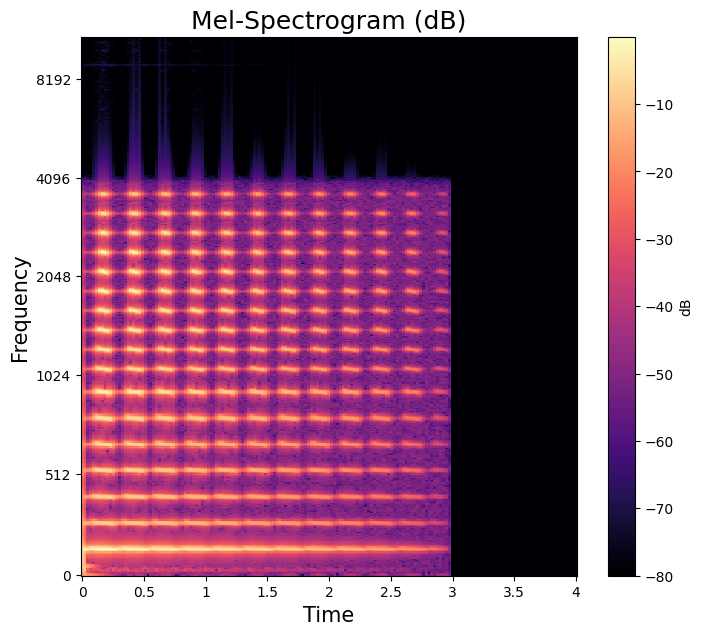

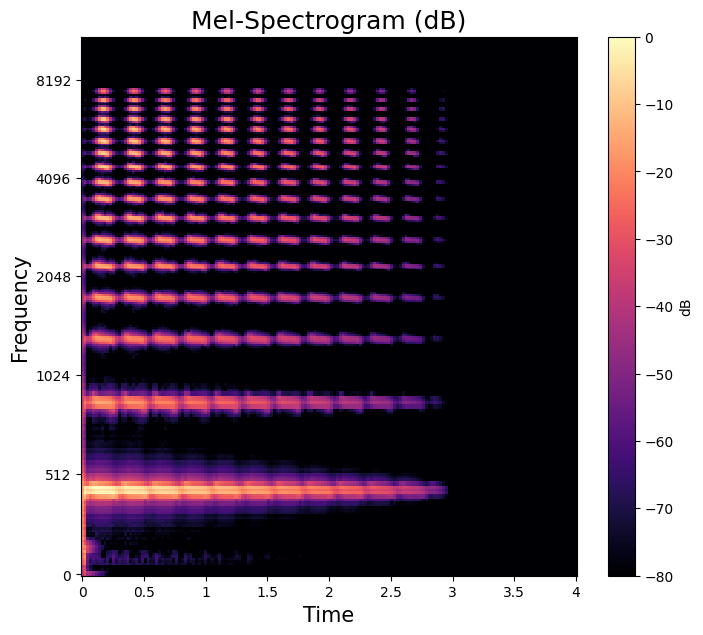

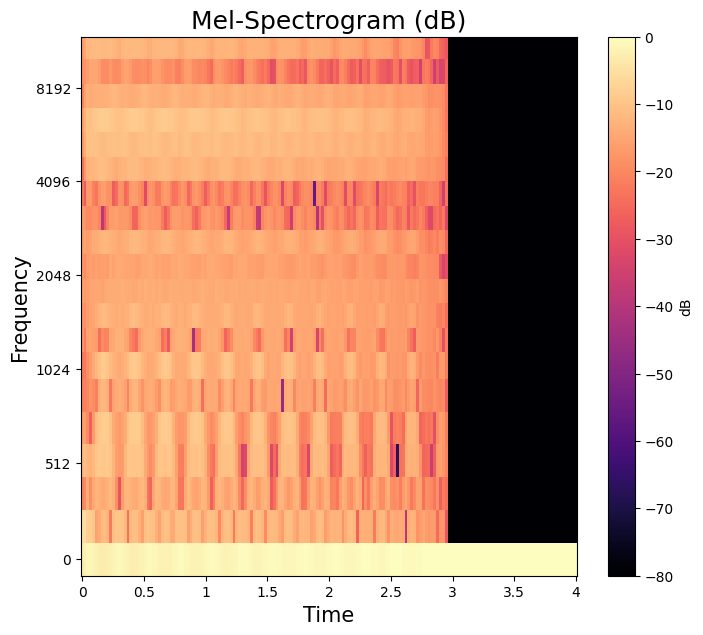

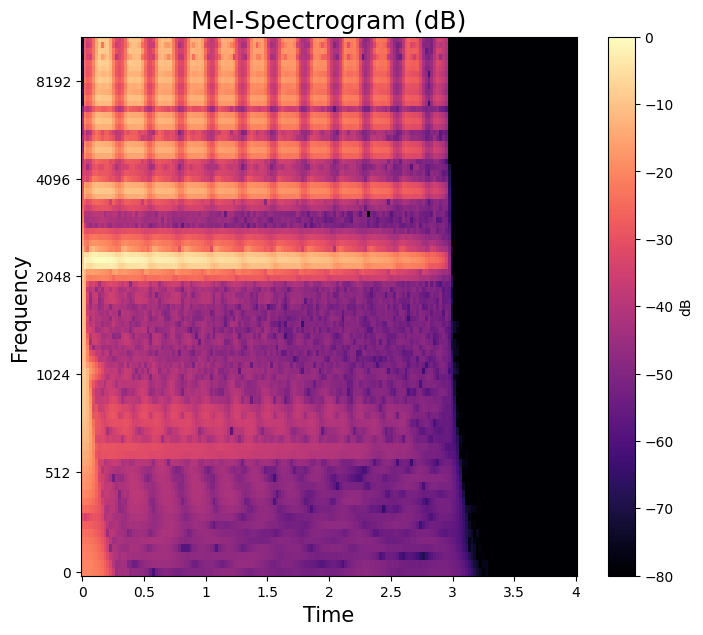

In [57]:
# draw_spectro(wave_spectro)
draw_spectro(stft_spectro)
draw_spectro(mel_spectro)
draw_spectro(mfcc_spectro)
draw_spectro(cqt_spectro)

In [58]:
wave_audio_back = wave_pipe.post_process(wave_spectro)
stft_audio_back = stft_pipe.post_process(stft_spectro)
mel_audio_back = mel_pipe.post_process(mel_spectro)
mfcc_audio_back = mfcc_pipe.post_process(mfcc_spectro)
cqt_audio_back = cqt_pipe.post_process(cqt_spectro)

In [59]:
print(wave_audio_back.shape)
print(stft_audio_back.shape)
print(mel_audio_back.shape)
print(mfcc_audio_back.shape)
print(cqt_audio_back.shape)

(88200,)
(88064,)
(88064,)
(88064,)
(88064,)


In [60]:
print(wave_audio_back)
print(stft_audio_back)
print(mel_audio_back)
print(mfcc_audio_back)
print(cqt_audio_back)

[-6.4886674e-09  1.5198230e-08 -3.1781153e-09 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-5.5698659e-09  1.6198811e-08 -2.1319655e-09 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[0.00451143 0.0117858  0.01557454 ... 0.         0.         0.        ]
[-3.7479089e-03 -8.2173171e-03 -1.1406194e-02 ...  3.3125576e-05
  1.0404322e-05 -2.0192532e-05]
[ 1.43952131e-04 -7.52399028e-04 -6.45872135e-04 ...  2.13242041e-14
  1.43225966e-14  7.16802275e-15]


In [49]:
sf.write('wave_process.wav', data=wave_audio_back, samplerate=wave_pipe.input_sr, subtype='PCM_24')
sf.write('stft_process.wav', data=stft_audio_back, samplerate=stft_pipe.input_sr, subtype='PCM_24')
sf.write('mel_process.wav', data=mel_audio_back, samplerate=mel_pipe.input_sr, subtype='PCM_24')
sf.write('mfcc_process.wav', data=mfcc_audio_back, samplerate=mfcc_pipe.input_sr, subtype='PCM_24')
sf.write('cqt_process.wav', data=cqt_audio_back, samplerate=cqt_pipe.input_sr, subtype='PCM_24')